In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from nltk.sentiment import SentimentIntensityAnalyzer

In [2]:
# 1. Data Exploration and Preprocessing

In [27]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sanke\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sanke\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sanke\AppData\Roaming\nltk_data...


True

In [6]:
data = pd.read_csv('blogs.csv')

In [7]:
data.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [8]:
data.describe()

,Data,Labels
count,2000,2000
unique,2000,20
top,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
freq,1,100


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [10]:
data.isnull().sum()

Data      0
Labels    0
dtype: int64

In [11]:
data['Labels'].value_counts()

alt.atheism                 100
comp.graphics               100
talk.politics.misc          100
talk.politics.mideast       100
talk.politics.guns          100
soc.religion.christian      100
sci.space                   100
sci.med                     100
sci.electronics             100
sci.crypt                   100
rec.sport.hockey            100
rec.sport.baseball          100
rec.motorcycles             100
rec.autos                   100
misc.forsale                100
comp.windows.x              100
comp.sys.mac.hardware       100
comp.sys.ibm.pc.hardware    100
comp.os.ms-windows.misc     100
talk.religion.misc          100
Name: Labels, dtype: int64

In [12]:
# Define a function to clean and preprocess the text
import string
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    print(text)
    text = ''.join([char for char in text if char not in string.punctuation])  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize the text
    stop_words = set(stopwords.words('english'))  # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Join tokens back into string
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

In [13]:
# Removing Punctuation
def remove_punctuation(text):
  for punctuation in string.punctuation:
    text = text.replace(punctuation, ' ')
  return text

data["Data"]=data["Data"].apply(remove_punctuation)    # data after remove puncuation
data.head()

,Data,Labels
0,Path cantaloupe srv cs cmu edu magnesium club...,alt.atheism
1,Newsgroups alt atheism\nPath cantaloupe srv ...,alt.atheism
2,Path cantaloupe srv cs cmu edu das news harva...,alt.atheism
3,Path cantaloupe srv cs cmu edu magnesium club...,alt.atheism
4,Xref cantaloupe srv cs cmu edu alt atheism 53...,alt.atheism


In [14]:
# tokenization
def preprocess_text(text):            # function
# Tokenization
    tokens = word_tokenize(data["Data"])
    print(tokens)
    print(len(tokens))

In [15]:
# converting to lowercase
data["Data"] = data["Data"].apply(lambda x: x.lower())
data.head()

,Data,Labels
0,path cantaloupe srv cs cmu edu magnesium club...,alt.atheism
1,newsgroups alt atheism\npath cantaloupe srv ...,alt.atheism
2,path cantaloupe srv cs cmu edu das news harva...,alt.atheism
3,path cantaloupe srv cs cmu edu magnesium club...,alt.atheism
4,xref cantaloupe srv cs cmu edu alt atheism 53...,alt.atheism


In [16]:
# Removing the stopwords
stopwords = nltk.corpus.stopwords.words("english")
data["Data"] = data["Data"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

data.head()

,Data,Labels
0,path cantaloupe srv cs cmu edu magnesium club ...,alt.atheism
1,newsgroups alt atheism path cantaloupe srv cs ...,alt.atheism
2,path cantaloupe srv cs cmu edu das news harvar...,alt.atheism
3,path cantaloupe srv cs cmu edu magnesium club ...,alt.atheism
4,xref cantaloupe srv cs cmu edu alt atheism 534...,alt.atheism


# 2. Naive Bayes Model for Text Classification

In [20]:
from sklearn.model_selection import train_test_split

# Feature extraction
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(data['Data'])
y = data['Labels']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [21]:
# predictions on training
y_predtrain= nb_classifier.predict(X_train)
print(y_predtrain)

['rec.sport.baseball' 'comp.os.ms-windows.misc' 'rec.motorcycles' ...
 'rec.motorcycles' 'sci.space' 'sci.crypt']


In [22]:
# Make predictions on test
y_predtest = nb_classifier.predict(X_test)
print(y_predtest)

['talk.politics.misc' 'comp.sys.ibm.pc.hardware' 'sci.med'
 'rec.sport.baseball' 'comp.sys.ibm.pc.hardware' 'sci.electronics'
 'rec.sport.baseball' 'talk.politics.mideast' 'alt.atheism' 'sci.med'
 'alt.atheism' 'sci.med' 'sci.crypt' 'rec.sport.baseball'
 'comp.sys.ibm.pc.hardware' 'comp.os.ms-windows.misc' 'rec.autos'
 'comp.graphics' 'talk.politics.guns' 'talk.politics.misc' 'misc.forsale'
 'talk.politics.misc' 'talk.religion.misc' 'rec.sport.hockey'
 'alt.atheism' 'sci.crypt' 'sci.crypt' 'rec.sport.baseball' 'rec.autos'
 'alt.atheism' 'misc.forsale' 'rec.sport.hockey' 'comp.windows.x'
 'rec.sport.hockey' 'rec.sport.hockey' 'comp.sys.mac.hardware' 'sci.med'
 'rec.sport.hockey' 'rec.sport.hockey' 'comp.os.ms-windows.misc'
 'comp.sys.ibm.pc.hardware' 'talk.religion.misc' 'comp.os.ms-windows.misc'
 'comp.graphics' 'soc.religion.christian' 'rec.motorcycles' 'sci.crypt'
 'rec.motorcycles' 'alt.atheism' 'talk.politics.guns'
 'soc.religion.christian' 'sci.crypt' 'sci.space'
 'comp.os.ms-wind

# 3. Sentiment Analysis

In [28]:
sia = SentimentIntensityAnalyzer()

In [29]:
# Define a function to analyze sentiment
def analyze_sentiment(text):
    sentiment_score = sia.polarity_scores(text)['compound']
    if sentiment_score > 0.05:
        return 'Positive'
    elif sentiment_score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [30]:
# Apply sentiment analysis to the 'Data' column
data['Sentiment'] = data['Data'].apply(analyze_sentiment)

Positive    1356
Negative     596
Neutral       48
Name: Sentiment, dtype: int64


C:\Users\sanke\AppData\Local\Temp\ipykernel_14260\3078545829.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=data, palette='coolwarm')


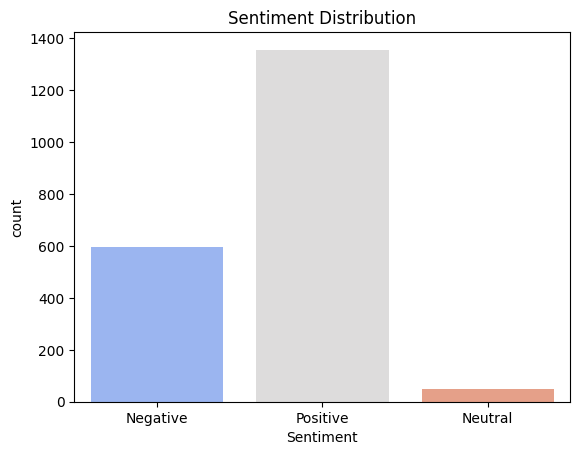

In [31]:
# Display sentiment distribution
print(data['Sentiment'].value_counts())
sns.countplot(x='Sentiment', data=data, palette='coolwarm')
plt.title("Sentiment Distribution")
plt.show()

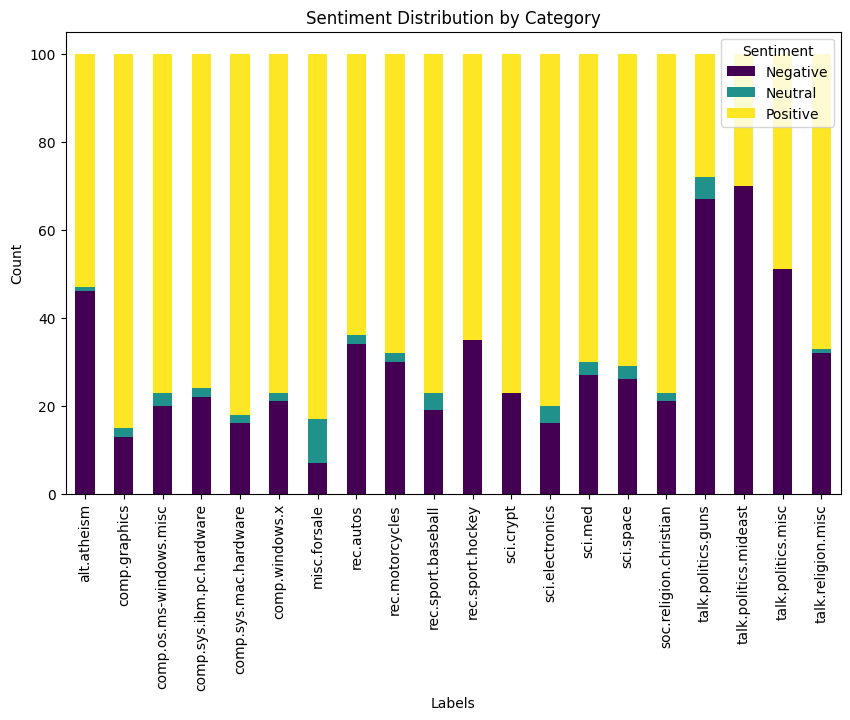

In [32]:
# Sentiment distribution by category
sentiment_by_category = data.groupby('Labels')['Sentiment'].value_counts().unstack()
sentiment_by_category.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title("Sentiment Distribution by Category")
plt.ylabel("Count")
plt.show()

# 4. Evaluation

In [36]:
accuracy = accuracy_score(y_test, y_predtest)
precision = precision_score(y_test, y_predtest, average='weighted')
recall = recall_score(y_test, y_predtest, average='weighted')
f1 = f1_score(y_test, y_predtest, average='weighted')

In [37]:
print(f"\nNaive Bayes Classifier Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Naive Bayes Classifier Performance:
Accuracy: 0.7875
Precision: 0.8115
Recall: 0.7875
F1 Score: 0.7761


In [39]:
print("\nFinal Reflections:")
print("Naive Bayes Classifier Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
print("\nSentiment Analysis Summary:")
print(data.groupby('Labels')['Sentiment'].value_counts())



Final Reflections:
Naive Bayes Classifier Performance Metrics:
Accuracy: 0.7875, Precision: 0.8115, Recall: 0.7875, F1 Score: 0.7761

Sentiment Analysis Summary:
Labels                    Sentiment
alt.atheism               Positive     53
                          Negative     46
                          Neutral       1
comp.graphics             Positive     85
                          Negative     13
                          Neutral       2
comp.os.ms-windows.misc   Positive     77
                          Negative     20
                          Neutral       3
comp.sys.ibm.pc.hardware  Positive     76
                          Negative     22
                          Neutral       2
comp.sys.mac.hardware     Positive     82
                          Negative     16
                          Neutral       2
comp.windows.x            Positive     77
                          Negative     21
                          Neutral       2
misc.forsale              Positive     83
   